In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Creating data frames from Statistical information

In [3]:
data= {
    'AAPL':[0.044857944, 0.009320453, -0.33517305, 5.034092588],
    'AMZN':[0.010361979, 0.009556763, -0.312865226, 4.729806047],
    'NFLX':[-0.29674829, 0.01340882, -3.101653581, 41.96801484],
    'META':[-0.006934385, 0.11581856, -1.936505944, 23.28923563],
    'GOOG':[0.029035134, 0.00837577, -0.197699834, 4.310171108]
}

In [4]:
df_stats = pd.DataFrame(data, index=['Mean', 'St Dev','Skew','Kurt'])
print("df_stats :")
print(df_stats)

df_stats :
            AAPL      AMZN       NFLX       META      GOOG
Mean    0.044858  0.010362  -0.296748  -0.006934  0.029035
St Dev  0.009320  0.009557   0.013409   0.115819  0.008376
Skew   -0.335173 -0.312865  -3.101654  -1.936506 -0.197700
Kurt    5.034093  4.729806  41.968015  23.289236  4.310171


In [5]:
data ={
    'AAPL': [1, 0.660738586, 0.460041141, 0.594784944, 0.698431255],
    'AMZN': [0.660738586, 1, 0.593812086, 0.626197627, 0.679322691],
    'NFLX': [0.460041141, 0.593812086, 1, 0.515892088, 0.492697083],
    'META': [0.594784944, 0.626197627, 0.515892088, 1, 0.668023785],
    'GOOG': [0.698431255, 0.679322691, 0.492697083, 0.668023785 ,1]
}

In [7]:
df_corr = pd.DataFrame(data, index=['AAPL','AMZN','NFLX','META','GOOG'])
print("df_corr :")
print(df_corr)

df_corr :
          AAPL      AMZN      NFLX      META      GOOG
AAPL  1.000000  0.660739  0.460041  0.594785  0.698431
AMZN  0.660739  1.000000  0.593812  0.626198  0.679323
NFLX  0.460041  0.593812  1.000000  0.515892  0.492697
META  0.594785  0.626198  0.515892  1.000000  0.668024
GOOG  0.698431  0.679323  0.492697  0.668024  1.000000


## Building the covariance matrix

In [10]:
std_deviations = df_stats.loc['St Dev']
diagonal_matrix = np.diag(std_deviations)
covariance_matrix = np.dot(diagonal_matrix, np.dot(df_corr.values, diagonal_matrix))
df_covariance = pd.DataFrame(covariance_matrix, columns=df_corr.columns, index=df_corr.index)
print("Covariance Matrix:")
print(df_covariance)


Covariance Matrix:
          AAPL      AMZN      NFLX      META      GOOG
AAPL  0.000087  0.000059  0.000057  0.000642  0.000055
AMZN  0.000059  0.000091  0.000076  0.000693  0.000054
NFLX  0.000057  0.000076  0.000180  0.000801  0.000055
META  0.000642  0.000693  0.000801  0.013414  0.000648
GOOG  0.000055  0.000054  0.000055  0.000648  0.000070


## Creating the function to compute portfolio return and variance

In [11]:
def get_portfolio_return(array_return, weights):
  return np.sum(array_return*weights)
def get_portfolio_variance(weights, df_cov):
  return np.dot(weights.T, np.dot(df_cov, weights))

## Now, Computing for each portfolio !

### For Portfolio A:

In [12]:
weights=np.array([1.5,0,0.5,0,0])
print(f"weights : {weights}")
print(f"weights sum : {np.sum(weights)}")
print(f"portfolio return : {get_portfolio_return(df_stats.loc['Mean'].values,weights)}")
print(f"portfolio variance : {get_portfolio_variance(weights, df_covariance)}")
print(f"portfolio std dev : {np.sqrt(get_portfolio_variance(weights,df_covariance))}")
print(f"portfolio range return: [{get_portfolio_return(df_stats.loc['Mean'].values, weights)}]")
print("Portfolio Coefficient of variation:", np.sqrt(get_portfolio_variance(weights, df_covariance)) / get_portfolio_return(df_stats.loc['Mean'].values, weights))

weights : [1.5 0.  0.5 0.  0. ]
weights sum : 2.0
portfolio return : -0.08108722900000001
portfolio variance : 0.0003266498560541807
portfolio std dev : 0.01807345722473099
portfolio range return: [-0.08108722900000001]
Portfolio Coefficient of variation: -0.22288907202305538


### For Portfolio B:


In [14]:
weights=np.array([0.6,0.0,.15,0.15,0.1])
print(f"weights : {weights}")
print(f"weights sum : {np.sum(weights)}")
print(f"portfolio return : {get_portfolio_return(df_stats.loc['Mean'].values,weights)}")
print(f"portfolio variance : {get_portfolio_variance(weights, df_covariance)}")
print(f"portfolio std dev : {np.sqrt(get_portfolio_variance(weights,df_covariance))}")
print(f"portfolio range return: [{get_portfolio_return(df_stats.loc['Mean'].values, weights)}]")
print("Portfolio Coefficient of variation:", np.sqrt(get_portfolio_variance(weights, df_covariance)) / get_portfolio_return(df_stats.loc['Mean'].values, weights))

weights : [0.6  0.   0.15 0.15 0.1 ]
weights sum : 1.0
portfolio return : -0.01573412145
portfolio variance : 0.0005274503773819544
portfolio std dev : 0.022966287845055725
portfolio range return: [-0.01573412145]
Portfolio Coefficient of variation: -1.459648568115999


### For Portfolio C:

In [15]:
weights=np.array([1.4,0.1,-0.3,-0.3,0.1])
print(f"weights : {weights}")
print(f"weights sum : {np.sum(weights)}")
print(f"portfolio return : {get_portfolio_return(df_stats.loc['Mean'].values,weights)}")
print(f"portfolio variance : {get_portfolio_variance(weights, df_covariance)}")
print(f"portfolio std dev : {np.sqrt(get_portfolio_variance(weights,df_covariance))}")
print(f"portfolio range return: [{get_portfolio_return(df_stats.loc['Mean'].values, weights)}]")
print("Portfolio Coefficient of variation:", np.sqrt(get_portfolio_variance(weights, df_covariance)) / get_portfolio_return(df_stats.loc['Mean'].values, weights))

weights : [ 1.4  0.1 -0.3 -0.3  0.1]
weights sum : 0.9999999999999999
portfolio return : 0.1578456354
portfolio variance : 0.0008963839152858104
portfolio std dev : 0.02993967126215334
portfolio range return: [0.1578456354]
Portfolio Coefficient of variation: 0.18967690292026498


In [16]:
m= np.random.random(5)*2-1

In [17]:
m

array([ 0.38652694,  0.39698873,  0.80086676, -0.10539967, -0.58251828])

In [19]:
m/=m.sum()
m

array([ 0.43116816,  0.44283821,  0.89336139, -0.11757261, -0.64979516])

In [20]:
m.sum()

1.0

In [23]:
arr_weights=[]
arr_returns=[]
arr_stddev=[]

for i in range(1000000):
  m=np.random.random(5)*2-1
  m/=m.sum()
  if m.sum()==1:
    arr_weights.append(m)
    arr_returns.append(get_portfolio_return(df_stats.loc['Mean'].values,m))
    arr_stddev.append(np.sqrt(get_portfolio_variance(m,df_covariance)))

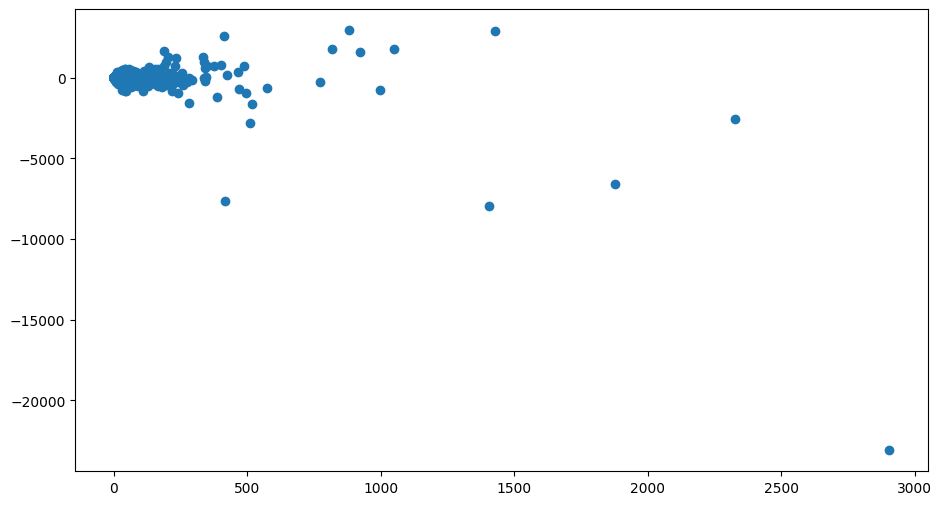

In [24]:
plt.rcParams['figure.figsize']=(11,6)
plt.scatter(arr_stddev ,arr_returns)
plt.show()